 # **I. ] EDA**

## **Import Libraries**

In [81]:
import os

from geopy.distance import geodesic

import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats
#print(os.listdir("../input"))
#print(os.listdir("../working"))

# Any results you write to the current directory are saved as output.

Commons parameters for Matplotlib

In [82]:
mpl.rcParams['axes.titlesize']=22
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['legend.markerscale']=3

 ## **I.1 ] Data Loading**

In [83]:
FILEPATH = '../input/nyc-taxi-trip-duration/train.csv'
df = pd.read_csv(FILEPATH)

 ## **I.2 ] Data Exploration**

In [84]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


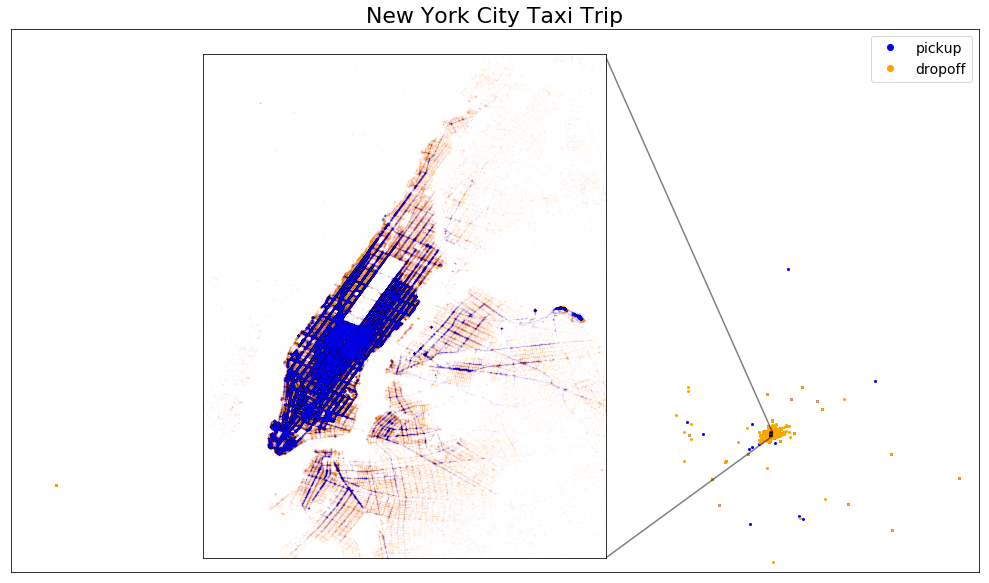

In [85]:
xminint, xmaxint = [-74.05, -73.85]
yminint, ymaxint = [40.65, 40.9]

xmin, xmax = [-125, -60]
ymin, ymax = [31.5, 53+15]


fig, ax = plt.subplots(1, figsize=[20, 10])
ax.plot( df['pickup_longitude'], df['pickup_latitude'], linestyle='', markersize=2, marker='o', color='blue', label='pickup');
ax.plot( df['dropoff_longitude'], df['dropoff_latitude'], linestyle='', markersize=2, marker='o', color='orange', label='dropoff');
ax.plot( [xminint, xmaxint, xmaxint, xminint, xminint], [yminint, yminint, ymaxint, ymaxint, yminint], color='black', linestyle='-' );

ax.set_title('New York City Taxi Trip')
ax.legend()

ax.set_xlim([xmin, xmax]);
ax.set_ylim([ymin, ymax]);
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])

ax.plot([xmaxint, -85], [yminint, 32.5], color='black', alpha=.5)
ax.plot([xmaxint, -85], [ymaxint, 66], color='black', alpha=.5)
sizeint=.7
a = plt.axes( [.1, .145, sizeint, sizeint], frameon=True)
a.plot( df['dropoff_longitude'], df['dropoff_latitude'],
       linestyle='', markersize=.05, marker='.', alpha=.5, color='orange');
a.plot( df['pickup_longitude'], df['pickup_latitude'],
       linestyle='', markersize=.05, marker='.', alpha=.5, color='blue');


a.set_xlim([xminint, xmaxint]);
a.set_ylim([yminint, ymaxint]);
a.set_aspect(1)
a.set_xticks([])
a.set_yticks([])
plt.show()

No surprises here, the majority of the dropoffs/pickups are in the city. But there are a few that are quite far away. It might be usefull to see what differentiates thoses points exept for the distances.


 ## **I.3 ] Data Prepocessing**

 ### **I.3.a ] Outliers**

 ### **I.3.b ] missing values**

 ### **I.3.c ] categorical variables**

In [86]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

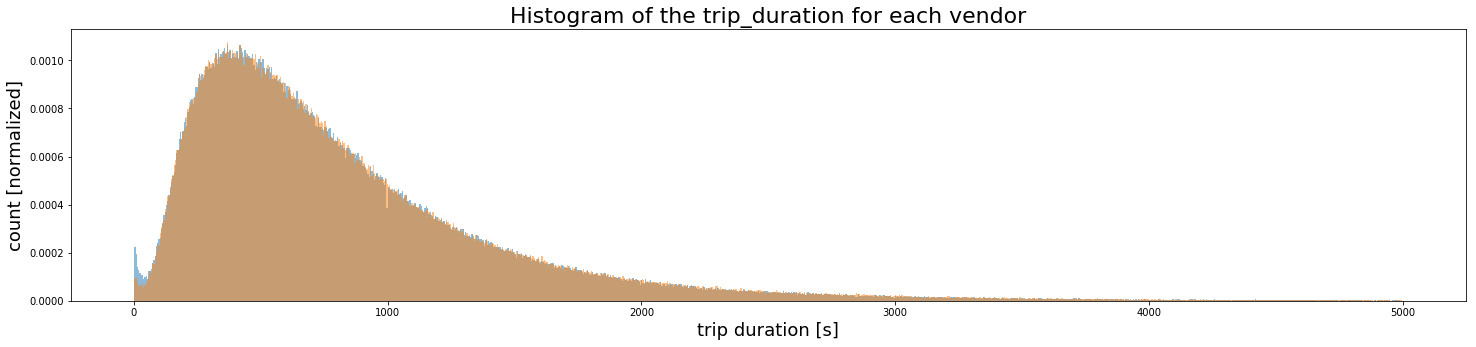

In [87]:
fig, ax = plt.subplots(1, figsize=[25,5])
plt.hist(df[(df['vendor_id']==1) & (df['trip_duration']<5000)]['trip_duration'], bins=1000, alpha=.5, density=True);
plt.hist(df[(df['vendor_id']==2) & (df['trip_duration']<5000)]['trip_duration'], bins=1000, alpha=.5, density=True);
plt.title('Histogram of the trip_duration for each vendor')
plt.xlabel('trip duration [s]')
plt.ylabel('count [normalized]')
plt.show()

In [88]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

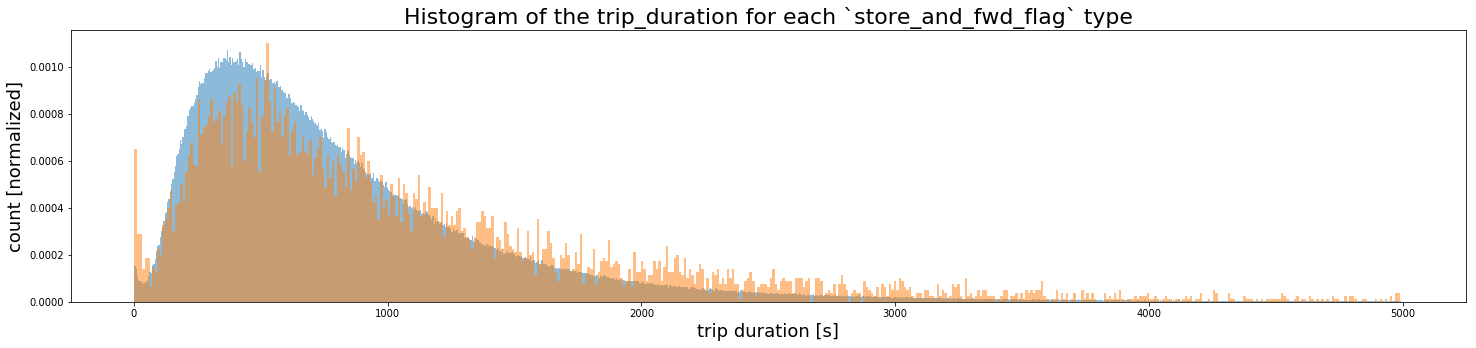

In [89]:
fig, ax = plt.subplots(1, figsize=[25,5])

plt.hist(df[(df['store_and_fwd_flag']=='N') & (df['trip_duration']<5000)]['trip_duration'], bins=1000, alpha=.5, density=True);
plt.hist(df[(df['store_and_fwd_flag']=='Y') & (df['trip_duration']<5000)]['trip_duration'], bins=500, alpha=.5, density=True);

plt.title('Histogram of the trip_duration for each `store_and_fwd_flag` type')
plt.xlabel('trip duration [s]')
plt.ylabel('count [normalized]')
plt.show()

In [90]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

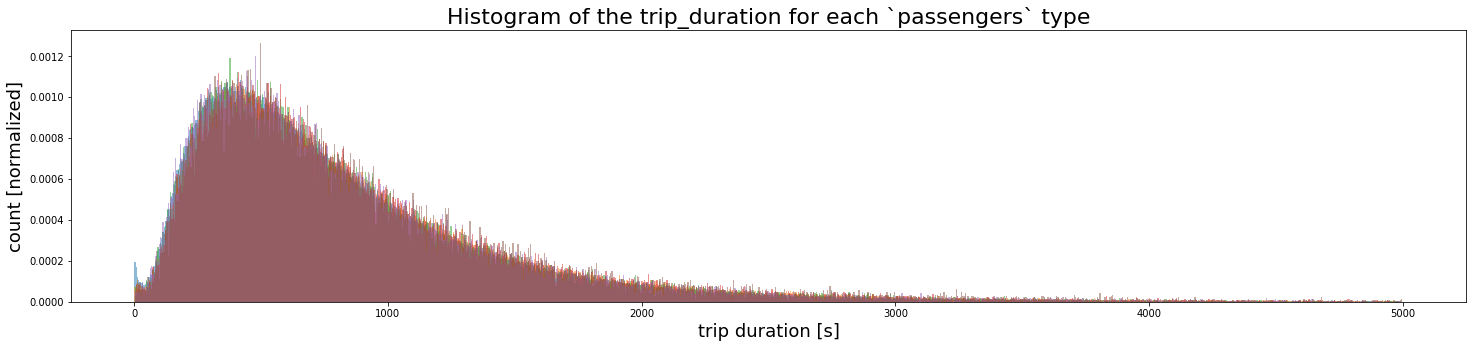

In [91]:
fig, ax = plt.subplots(1, figsize=[25,5])
pass_cat = [1, 2, 5, 3, 6, 4]
for num in pass_cat:
    plt.hist(df[(df['passenger_count']==num) & (df['trip_duration']<5000)]['trip_duration'], bins=1000, alpha=.5, density=True);

plt.title('Histogram of the trip_duration for each `passengers` type')
plt.xlabel('trip duration [s]')
plt.ylabel('count [normalized]')
plt.show()

 ### **I.3.d ] Scaling data**

 ## **I.4 ] Data Engineering**

 ### **I.4.a ] Features creation**

In [92]:
def featuresEngineering(dfin):
    dfout = dfin.copy()
    
    #Distances
    dfout['distances'] = dfout.apply(lambda x: geodesic( (x['pickup_latitude'], x['pickup_longitude']),
                (x['dropoff_latitude'], x['dropoff_longitude']) ).km, axis=1)
    
    #Dates
    dfout['pickup_Year'] = dfout['pickup_datetime'].apply(lambda x: 
                                        dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').year)
    dfout['pickup_Month'] = dfout['pickup_datetime'].apply(lambda x: 
                                        dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').month)
    dfout['pickup_Hour'] = dfout['pickup_datetime'].apply(lambda x: 
                                        dt.datetime.strptime( x, '%Y-%m-%d %H:%M:%S').hour
                                                      + dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').minute/60  )
    dfout['pickup_Weekday'] = dfout['pickup_datetime'].apply(lambda x: 
                                        dt.datetime.strftime( dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'), '%w') )
    return dfout

In [93]:
#df_train = featuresEngineering(df)
#df_train.head()

In [94]:
df_train=pd.read_csv('../input/ny-taxis/training_engineered.csv')
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distances,pickup_Year,pickup_Month,pickup_Hour,pickup_Weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172,2016,3,17.400000,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660,2016,6,0.716667,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.379687,2016,1,11.583333,2
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.483632,2016,4,19.533333,3
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.187038,2016,3,13.500000,6


 ### **I.4.b ] Data reprocessing**

In [95]:
# remove trip of less than 200m (#16863)
df_train = df_train[df_train['distances']>0.2]
df_train[df_train['distances']<=0.2].shape

(0, 16)

In [96]:
#remove trips that lasted less than 2 min (#28318) (#19807 left after previous filtering)
df_train = df_train[df_train['trip_duration']>2*60]
df_train[df_train['trip_duration']<=2*60].shape

(0, 16)

In [97]:
#remove trip with an average speed greater than 200 km/h (distances are in straigth lines, I could probably choose a smaller number) (#68) (#20 after the two filters)
df_train = df_train[df_train['distances']/(df_train['trip_duration']/3600)<200]
df_train[df_train['distances']/(df_train['trip_duration']/3600)>=200].shape

(0, 16)

In [98]:
# remove that took longer that 2 hours (Who does that ??) (#2253) (#2217 after filtering)
df_train = df_train[df_train['trip_duration']<2*3600]
df_train[df_train['trip_duration']>=2*3600].shape

(0, 16)

In [99]:
#remove trip with an average speed less than 1 km/h (I could probably choose a bigger number) (#13239) (#611 after the filters)
df_train = df_train[df_train['distances']/(df_train['trip_duration']/3600)>1]
df_train[df_train['distances']/(df_train['trip_duration']/3600)<=1].shape

(0, 16)

In [ ]:
fig, ax = plt.subplots(2, figsize=[20,8])
ax[0].hist( np.log1p( df_train['distances'] ) , bins=1000 );
#ax[0].set_ylim([0, 10000]);
ax[0].set_xlabel('Distances: log ( 1 + D ); D in [km]');
ax[0].set_ylabel('Count [#]');

ax[1].hist( ( df_train['trip_duration'] ) , bins=500 );
ax[1].set_xlim([0, 5000]);
ax[1].set_xlabel('Trip Duration: in [s]');
ax[1].set_ylabel('Count [#]');

In [ ]:
plt.plot(df_train['distances'], df_train['trip_duration'], linestyle='', marker='.');

 ### **I.4.c ] Features Selection & extraction**

In [ ]:
def featuresSelection(df_in):
    #VARS_CAT = [ 'store_and_fwd_flag' ]
    VARS_NUM = ['vendor_id', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distances', 'pickup_Year', 'pickup_Month', 'pickup_Hour', 'pickup_Weekday' ] # 'passenger_count',
    #vars_cat = VARS_CAT
    vars_num = VARS_NUM

    #X=df_in.loc[:, vars_cat + vars_num]
    X=df_in.loc[:, vars_num]

    #for cat in vars_cat:
    #    X[cat] = X[cat].astype('category').cat.codes

    return X

In [ ]:
X_train = featuresSelection(df_train)
target = 'trip_duration'
y_train =df_train.loc[:, target]
print(X_train.shape, y_train.shape)
X_train.head()

# **Train and Test saving**

To save time

In [ ]:
FILEPATH = '../input/nyc-taxi-trip-duration/test.csv'
test = pd.read_csv(FILEPATH)


#df_test = featuresEngineering(test)
df_test = pd.read_csv('../input/ny-taxis/testing_engineered.csv')
df_test.head()

In [ ]:
#df_train.to_csv("training_engineered.csv", index=False)
#df_test.to_csv("testing_engineered.csv", index=False)

# ** II. ] MACHINE LEARNING**

## **Import Libraries**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.metrics import mean_squared_error as MSE

## ** II.1. ] Validation Model Choice**

## ** II.2. ] Model Selection**

In [ ]:
rf1 = RandomForestRegressor( n_estimators=100 )
#lr1 = LinearRegression()
#lr2 = SGDRegressor()

## ** II.3. ] Model training**

In [ ]:
rf1.fit( X_train, y_train );
#lr2.fit( X_train, y_train )

In [ ]:
rf1_scores=-cross_val_score( rf1, X_train, y_train, cv=5, scoring='neg_mean_squared_log_error' )
rf1_scores

## ** II.4. ] Predictions**

In [ ]:
X_test = featuresSelection(df_test)
X_test.head()

y_test_predict = rf1.predict(X_test)
#y_test_predict = lr2.predict(X_test)

In [ ]:
y_test_predict[:5]

## ** II.5. ] Submissions**

In [ ]:
submission = pd.DataFrame(df_test.loc[:, 'id'])
submission['trip_duration']=y_test_predict
print(submission.shape)
submission.head()

In [ ]:
submission.to_csv("submit_file.csv", index=False)